In [1]:
# !pip install matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("annual-co-emissions-by-region.csv")


In [4]:
df

,Entity,Code,Year,Annual CO₂ emissions (zero filled)
0,Afghanistan,AFG,1750,0.0
1,Afghanistan,AFG,1751,0.0
2,Afghanistan,AFG,1752,0.0
3,Afghanistan,AFG,1753,0.0
4,Afghanistan,AFG,1754,0.0
...,...,...,...,...
73163,Zimbabwe,ZWE,2017,9596071.0
73164,Zimbabwe,ZWE,2018,11795478.0
73165,Zimbabwe,ZWE,2019,11114607.0
73166,Zimbabwe,ZWE,2020,10607897.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73168 entries, 0 to 73167
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Entity                              73168 non-null  object 
 1   Code                                63376 non-null  object 
 2   Year                                73168 non-null  int64  
 3   Annual CO₂ emissions (zero filled)  73168 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 2.2+ MB


In [3]:
df.isna().sum()

Entity                                   0
Code                                  9792
Year                                     0
Annual CO₂ emissions (zero filled)       0
dtype: int64

In [8]:
df[df.isna().any(axis=1)][['Entity','Code']]


,Entity,Code
272,Africa,NaN
273,Africa,NaN
274,Africa,NaN
275,Africa,NaN
276,Africa,NaN
...,...,...
70171,Upper-middle-income countries,NaN
70172,Upper-middle-income countries,NaN
70173,Upper-middle-income countries,NaN
70174,Upper-middle-income countries,NaN


In [4]:
df = df.rename(columns={'Annual CO₂ emissions (zero filled)': 'annual'}) 
df

,Entity,Code,Year,annual
0,Afghanistan,AFG,1750,0.0
1,Afghanistan,AFG,1751,0.0
2,Afghanistan,AFG,1752,0.0
3,Afghanistan,AFG,1753,0.0
4,Afghanistan,AFG,1754,0.0
...,...,...,...,...
73163,Zimbabwe,ZWE,2017,9596071.0
73164,Zimbabwe,ZWE,2018,11795478.0
73165,Zimbabwe,ZWE,2019,11114607.0
73166,Zimbabwe,ZWE,2020,10607897.0


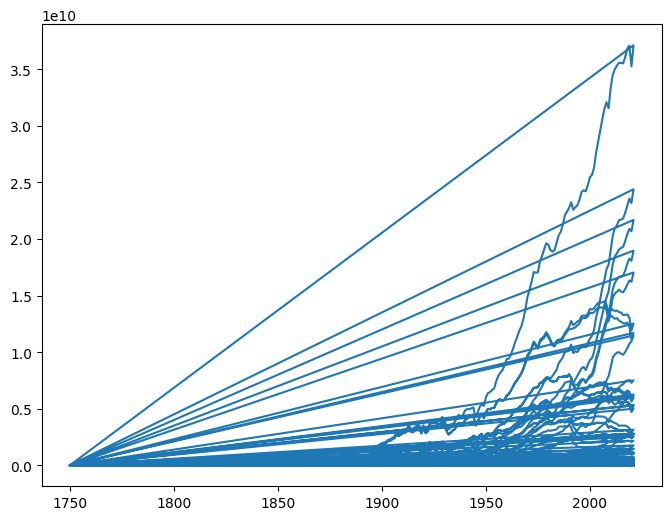

In [9]:
plt.figure(figsize = (8,6))
plt.plot(df['Year'],df['annual'])
plt.show()

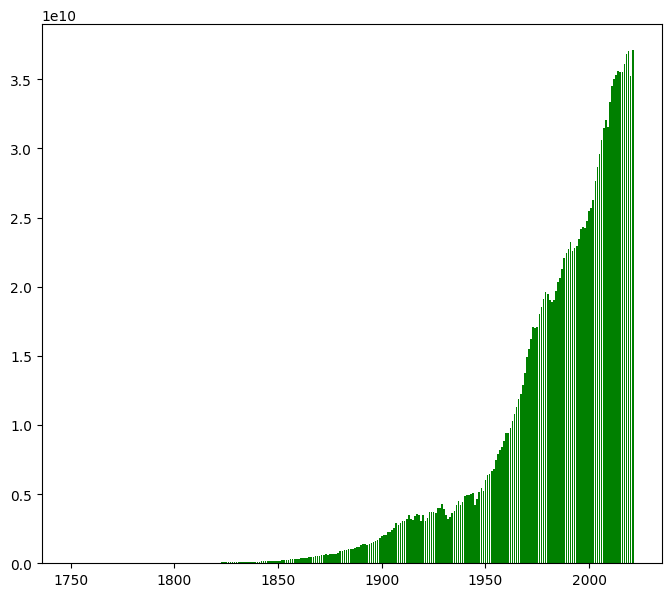

In [ ]:
assy = df[df['annual'] != 0.0]
assx = assy[assy['annual'] != 0.0]['Year']
plt.figure(figsize = (8,7))
plt.bar(assx,assy['annual'],color='Green')
plt.show()

In [ ]:
df.groupby('Code')['annual'].mean() # bölgeler göre co2 emisyon ortalamaları

Code
ABW    2.825952e+05
AFG    8.014451e+05
AGO    2.415866e+06
AIA    1.319261e+04
ALB    1.080290e+06
           ...     
WSM    2.625906e+04
YEM    2.395576e+06
ZAF    7.891581e+07
ZMB    9.472854e+05
ZWE    2.934622e+06
Name: annual, Length: 233, dtype: float64

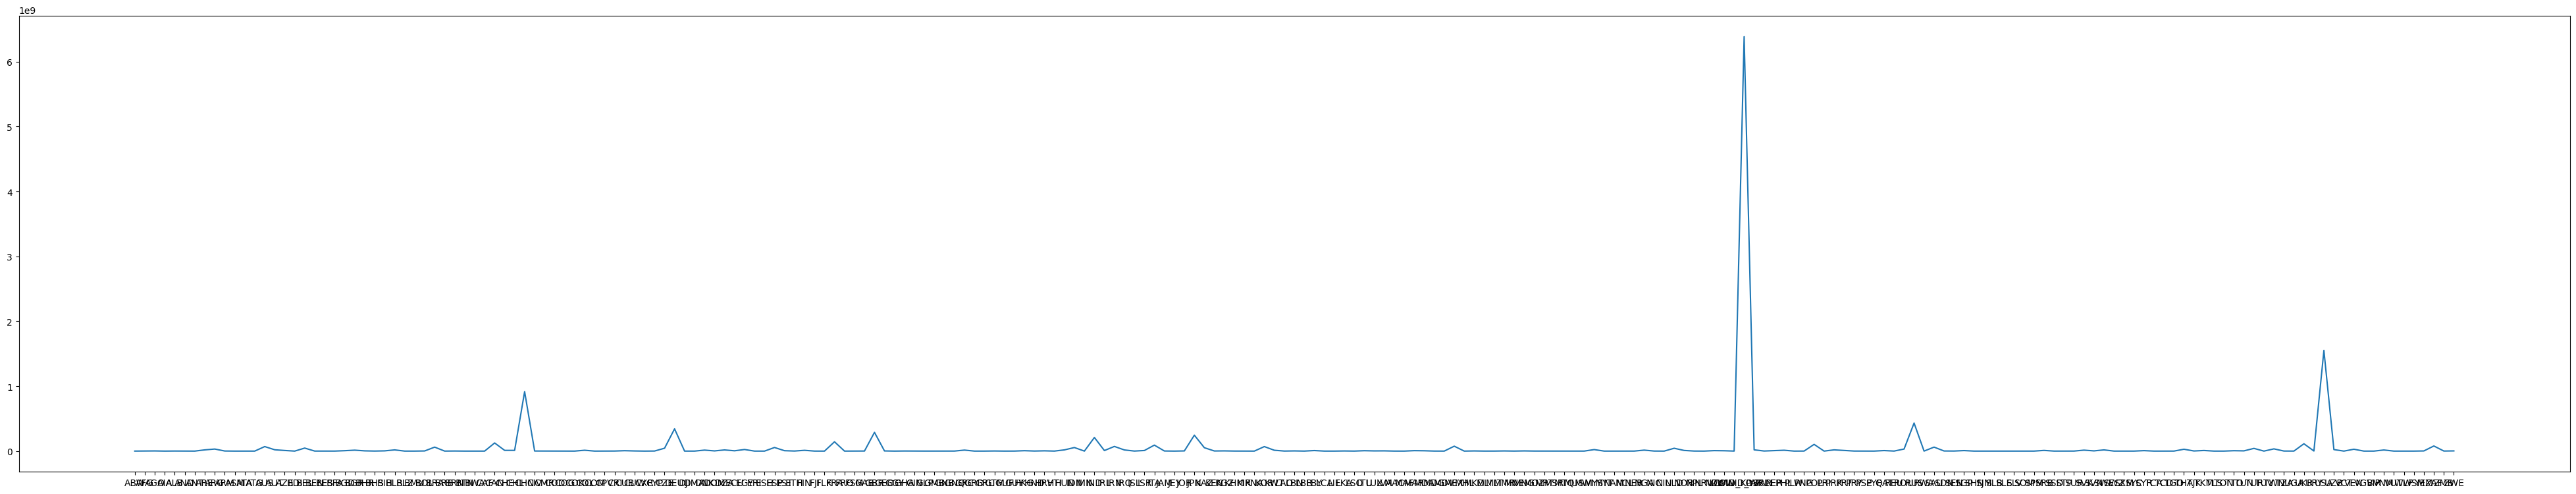

In [10]:
plt.figure(figsize = (50,9))
groupdata =df.groupby('Code')['annual'].mean()

plt.plot(groupdata.index,groupdata.values)
plt.show()

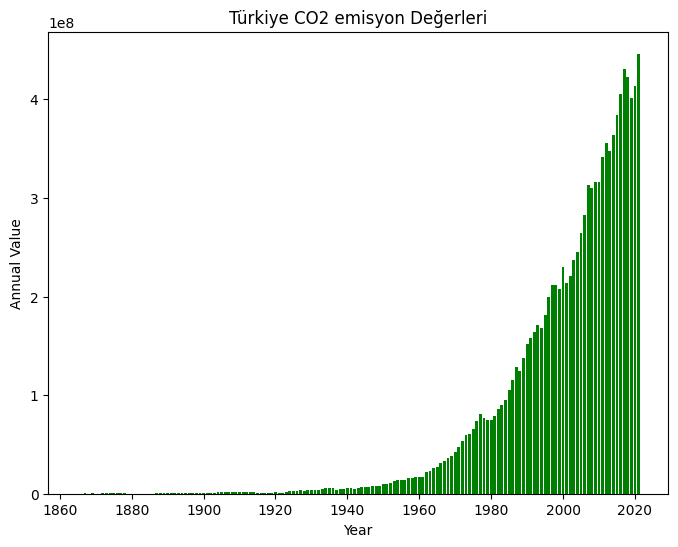

In [11]:
atsy = df[df['Code'] == 'TUR']
atsx = atsy[atsy['annual'] != 0.0]['Year']
plt.figure(figsize = (8,6))

plt.bar(atsx, atsy[atsy['annual'] != 0.0]['annual'], color='green')
plt.xlabel('Year')
plt.ylabel('Annual Value')
plt.title('Türkiye CO2 emisyon Değerleri')


plt.show()
